In [163]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from copy import deepcopy
points = np.random.rand(100, 2)

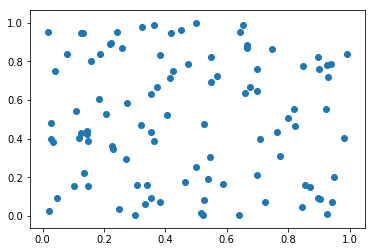

In [164]:
plt.scatter(points[:, 0], points[:, 1]);

In [2]:
def distance(A, B):
    squares = [(a - b)**2 for a, b in zip(A, B)]
    return sum(squares)**0.5

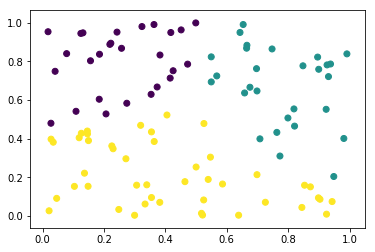

In [169]:
k=3
clusters = np.zeros(len(points))
centroids = deepcopy(points[:k])
for i in range(k):
    cluster = assignPoints(points, centroids, clusters)
    centroids = updateCentroids(points, centroids, clusters)

plt.scatter(points[:, 0], points[:, 1], c=clusters)
plt.show()

Centroid - average of all points in cluster

In [166]:
def updateCentroids(points, centroids, clusters):
    # define empty list to store new cluster centroid coordinates
    new_centroids = []

    for cluster in range(len(centroids)):
        # create empty lists to store x and y coordinates for each point in cluster
        x_pnts = []
        y_pnts = []
        
        for i in range(len(clusters)):
            # append coordinates to x and y lists if in cluster
            if clusters[i] == int(cluster):
                x_pnts.append(points[i][0])
                y_pnts.append(points[i][1])
            else:
                pass
        # calc average x and y points for cluster
        x_avg = sum(x_pnts)/len(x_pnts)
        y_avg = sum(y_pnts)/len(y_pnts)
        new_centroids.append([x_avg, y_avg])
    # update centroid coordinates
    centroids = np.array(new_centroids)
    return(centroids)

For each point, find the distance to all centroids and assign it to the closest one. The distance function is already available above.

In [167]:
def assignPoints(points, centroids, clusters):
    # iterate through all points
    for j in range(len(points)):
        # define blank dictionary for point
        clust_dist = {}
        # iterate through all cluster centroids
        for i in range(len(centroids)):
            # update dictionary with distance between point and cluster centroid
            clust_dist[i] = distance(points[j], centroids[i])
        # assign point to cluster with miniumum distance
        clusters[j] = min(clust_dist.keys(), key=(lambda k: clust_dist[k]))
    return(clusters)

We have a points array of length 100. We create "clusters" to be a list of the same length. We can use it to assign each point a cluster number. We will have k "centroids" and we just assign the first k points to be the centroids.

In [160]:
def KMeans(points, k=3):
    clusters = np.zeros(len(points))
    centroids = deepcopy(points[:k])
    while assignPoints(points, centroids, clusters):
        updateCentroids(points, centroids, clusters)
    plt.scatter([p[0] for p in points], [p[1] in points], c=clusters)
    plt.show()